CAPSTONE 2: Retail Sales Forecast for 45 Walmart Stores

Data source: Walmart.csv (from Kaggle.com)

1. Data Wrangling
2. Exploratory Data Analysis



In [1]:
from pathlib import Path

import os
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

import ydata_profiling
from ydata_profiling.utils.cache import cache_file

In [2]:
#Load the walmart.csv file into a dataframe
path = 'Walmart.csv'
df = pd.read_csv(path)

print(df.head())
#print(df.info())
#print(df.describe())
#print(df.isna().sum())
#print(df.nunique())



   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


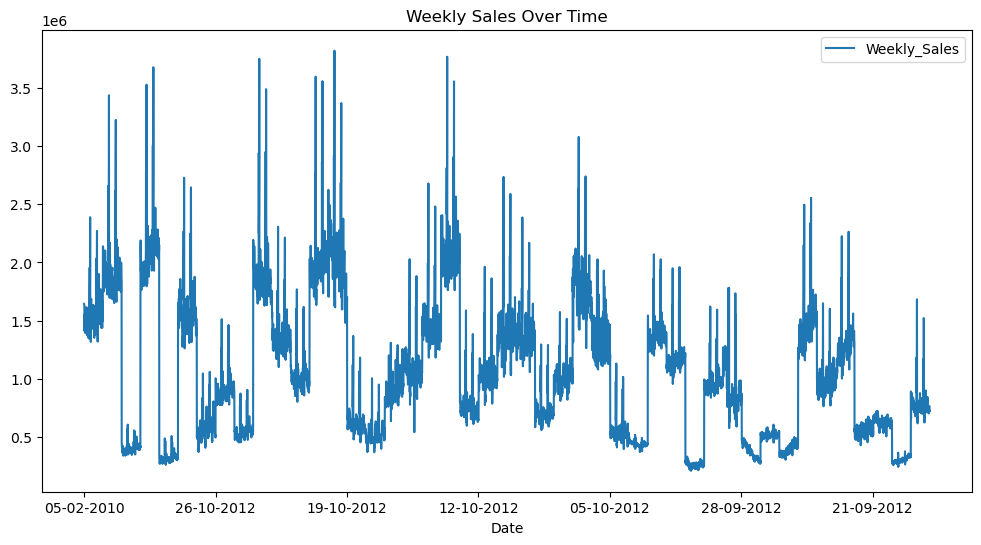

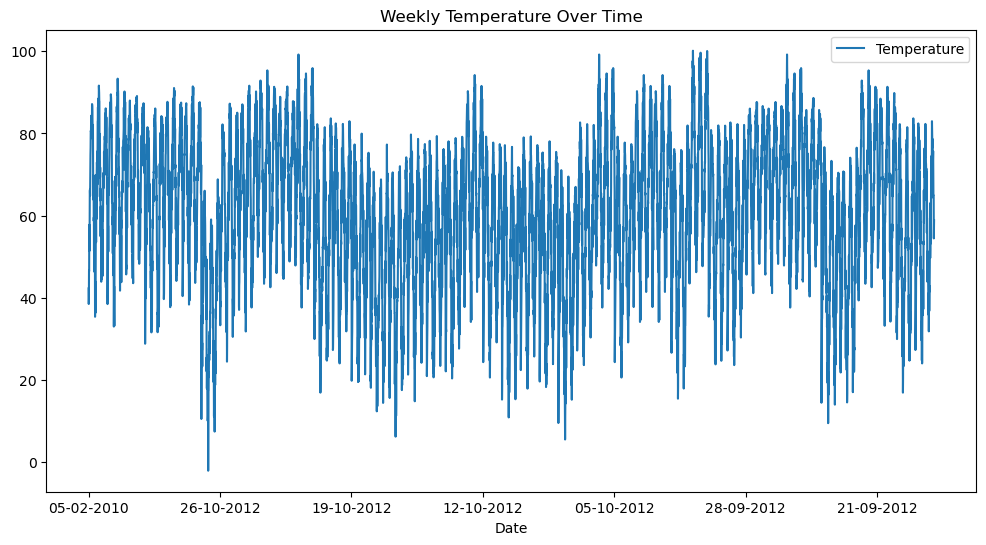

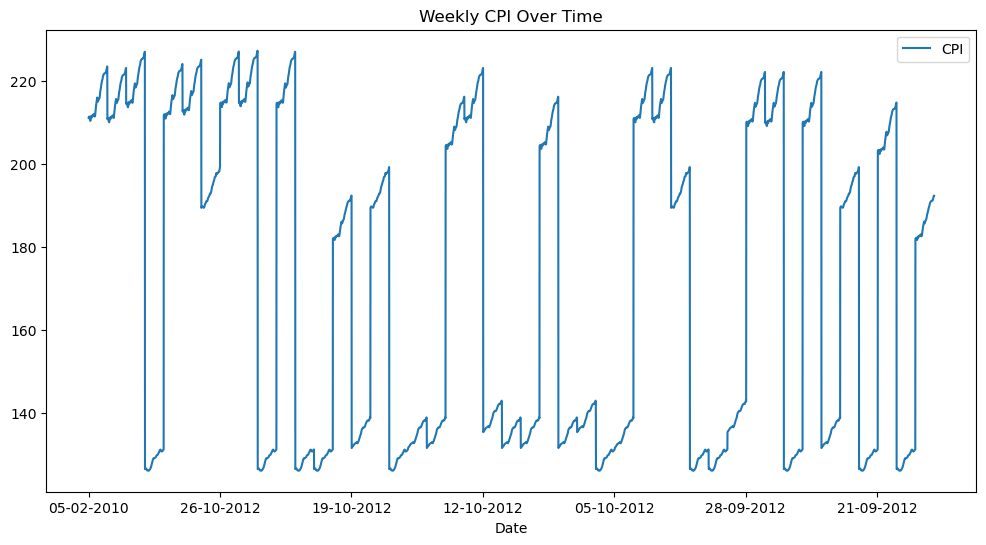

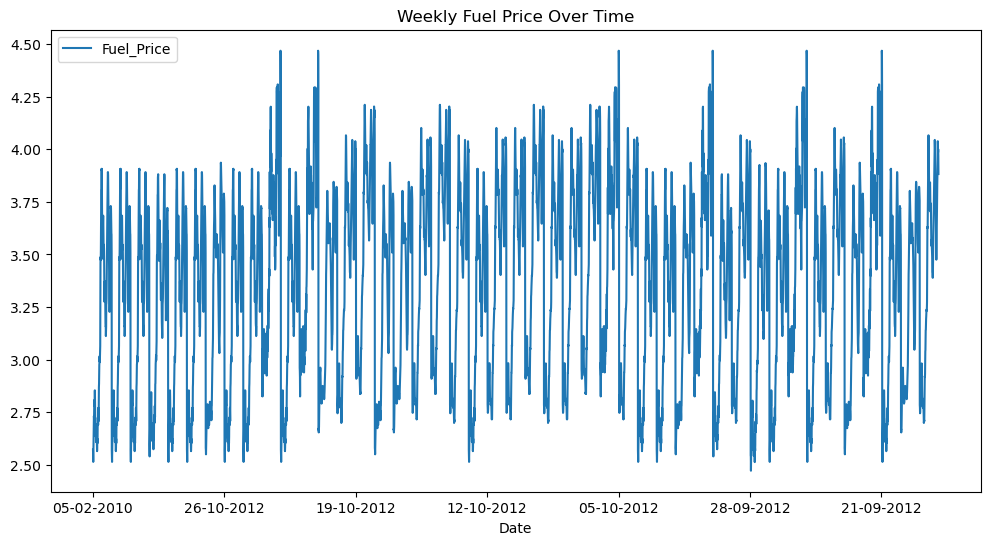

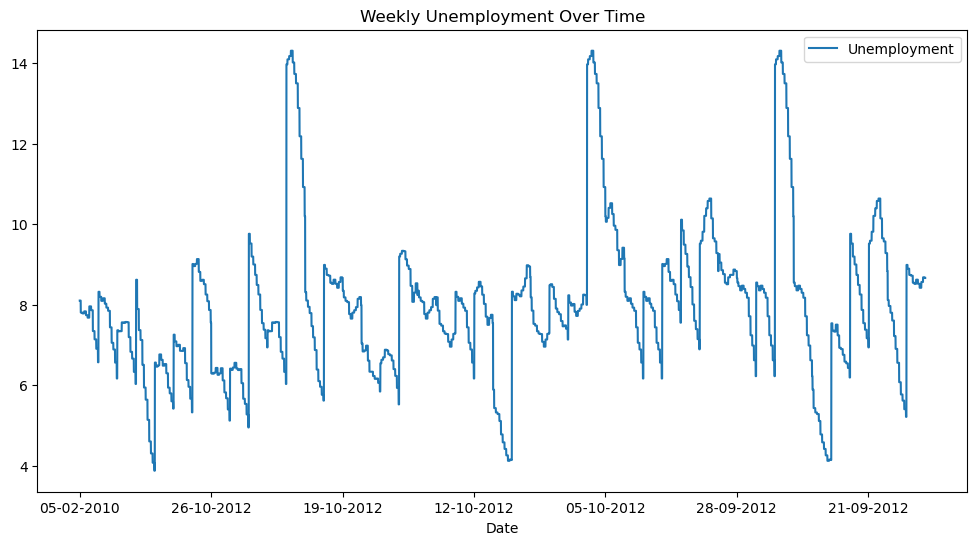

In [32]:
#Build a few trend charts to get sense of certain measures, may need to filter by sample set of stores


#plot sales for 2010, 2011, and 2012
df.plot(x='Date', y='Weekly_Sales', kind='line', figsize=(12,6), title='Weekly Sales Over Time')

#plot temp, using avg. and then compare with sample for 1 store
df.plot(x='Date', y='Temperature', kind='line', figsize=(12,6), title='Weekly Temperature Over Time')

#plot cpi, using avg. and then compare with sample for 1 store
df.plot(x='Date', y='CPI', kind='line', figsize=(12,6), title='Weekly CPI Over Time')

#plot fuel price, using avg. and then compare with sample for 1 store
df.plot(x='Date', y='Fuel_Price', kind='line', figsize=(12,6), title='Weekly Fuel Price Over Time')

#plot unemployment, using avg. and then compare with sample for 1 store
df.plot(x='Date', y='Unemployment', kind='line', figsize=(12,6), title='Weekly Unemployment Over Time')

plt.show()








In [60]:
#Ydataprofile indicates that only 7% of values are holiday.  Investigate holiday flags.  
#print(df.head())

df_holiday = df[df.Holiday_Flag == 1]
print(df_holiday.head(25).sort_values('Date', ascending=False))

#To investigate seasonality, create features year, month, week, dayofweek


     Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
190      2  31-12-2010    1750434.55             1        47.30       2.943   
47       1  31-12-2010    1367320.01             1        48.43       2.943   
333      3  31-12-2010     382677.76             1        53.20       2.943   
99       1  30-12-2011    1497462.72             1        44.55       3.129   
242      2  30-12-2011    1874226.52             1        44.57       3.129   
185      2  26-11-2010    2658725.29             1        62.98       2.735   
42       1  26-11-2010    1955624.11             1        64.52       2.735   
328      3  26-11-2010     565567.84             1        68.71       2.735   
94       1  25-11-2011    2033320.66             1        60.14       3.236   
237      2  25-11-2011    2614202.30             1        56.36       3.236   
287      3  12-02-2010     420728.96             1        47.93       2.548   
1        1  12-02-2010    1641957.44             1  



<h1>SUMMARY OF EXPLORATORY DATA ANALYSIS</h1>

<b>STRUCTURE AND TYPES</b>
- 8 features 
    - numerical: weekly_sales, temperature, fuel_price, CPI, unemployment
    - categorical: date, holiday_flag, store
- 6,435 observations

<b>VERIFIED</b>
- 45 stores and 2 values for holiday_flag, appears correct 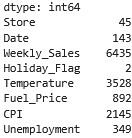
- Min and max values look realistic 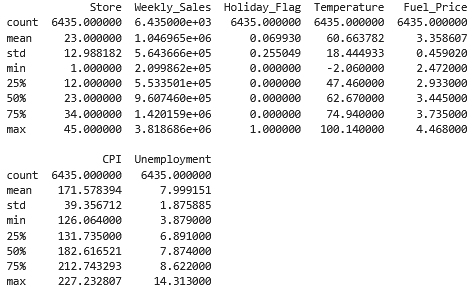

<b>MISSING OR NULL VALUES</b>
- None of the columns have missing data or null values, so no need to drop, impute, or flag

<b>OUTLIER OR ANOMALIES</b>
- Genuine extremes-- none.

<b>DISTRIBUTIONS</b> 
- Holiday flag is imbalanced, with 7% of values = 1 and 93% = 0.  Keep this in mind, since it was stated there are four holidays in the data.
- Weekly_Sales is right-skewed with some outliers at $3.5M. 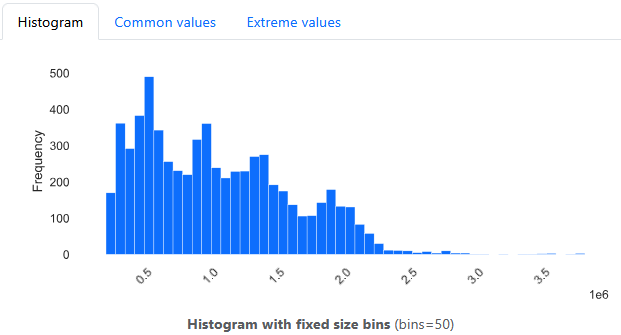
- CPI has a bimodal distribution.  Investigate further. 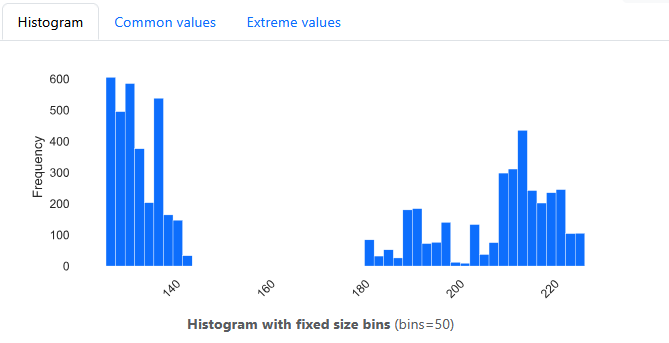

<b>RELATIONSHIPS</b>
- Most features show weak correlation or no correlations, but there are some interesting relationships. 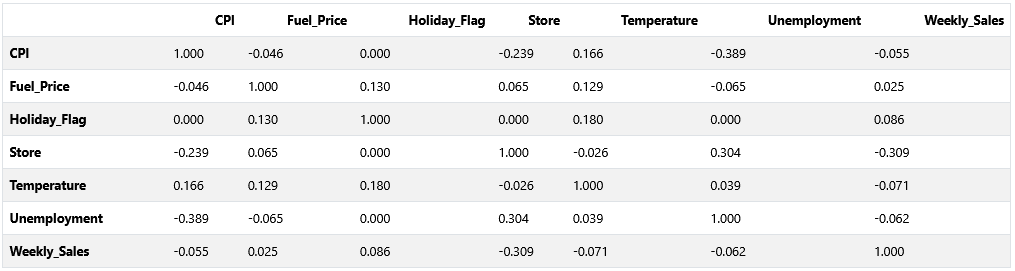
  - Stores and unemployment: Moderate positive correlation(.30), some stores may be in areas with higher unemployment
  - Unemployment and CPI: Moderate negative correlation(-.389), as unemployment increases, CPI tends to decrease
  - Temperature and Holiday fag: Weak positive correlation (.18), as holidays might occur during warmer periods
- Since we don't have linear relationships with weekly_sales, we'll need to look at seasonality and consider feature engineering

<b>FEATURE ENGINEERING CONSIDERATIONS</b>
- Year, month, day, week_no, day_of_week, promotional timeframe(maybe)
- Group stores by annual sales, holiday growth variation
- Categorize the specific holidays






<H1>YDATA PROFILING - TOOL USED FOR EDA</H1>

In [71]:
#inline report w/o saving any object

report = df.profile_report(
    sort=None, html={"style": {"full_width": True}}, progress_bar=False
)
report

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 69.68it/s]


In [27]:
profile_report = df.profile_report(html={"style": {"full_width": True}})
profile_report.to_file("y-dataprofiling.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 65.36it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]